In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")


In [2]:
df = pd.read_excel("Online Retail.xlsx")

In [3]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [6]:
df['InvoiceNo'].str.startswith('C').sum()


9288

In [7]:
df.loc[df['Country'] == 'France', ['InvoiceNo', 'Quantity']]


,InvoiceNo,Quantity
26,536370,24
27,536370,24
28,536370,12
29,536370,12
30,536370,24
...,...,...
541904,581587,12
541905,581587,6
541906,581587,4
541907,581587,4


In [8]:
df.drop(columns=['CustomerID'], inplace=True)


In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df.drop(columns=['Description'], inplace=True)


In [11]:

df['IsCompleted'] = (~df['InvoiceNo'].astype(str).str.startswith('C')).astype(int)

In [12]:
df['IsCompleted'].value_counts()

IsCompleted
1    527390
0      9251
Name: count, dtype: int64

In [13]:
completed_sales_by_country = df[df['IsCompleted'] == 1]['Country'].value_counts()
print("Completed sales by country:\n", completed_sales_by_country)

Completed sales by country:
 Country
United Kingdom          482479
Germany                   9027
France                    8393
EIRE                      7883
Spain                     2480
Netherlands               2363
Belgium                   2031
Switzerland               1959
Portugal                  1492
Australia                 1184
Norway                    1072
Italy                      758
Channel Islands            747
Finland                    685
Cyprus                     603
Sweden                     450
Unspecified                442
Austria                    398
Denmark                    380
Poland                     330
Japan                      321
Israel                     292
Hong Kong                  280
Singapore                  222
Iceland                    182
USA                        179
Canada                     151
Greece                     145
Malta                      112
United Arab Emirates        68
European Community          60
RS

In [14]:
cancellations_by_country = df[df['IsCompleted'] == 0]['Country'].value_counts()
print("Cancellations by country:\n", cancellations_by_country)

Cancellations by country:
 Country
United Kingdom        7821
Germany                453
EIRE                   301
France                 148
USA                    112
Australia               74
Spain                   48
Italy                   45
Belgium                 38
Japan                   37
Switzerland             35
Portugal                18
Malta                   15
Norway                  14
Poland                  11
Sweden                  11
Channel Islands         10
Finland                 10
Denmark                  9
Netherlands              8
Cyprus                   8
Singapore                7
Czech Republic           5
Hong Kong                4
Austria                  3
Israel                   2
Bahrain                  1
Saudi Arabia             1
European Community       1
Greece                   1
Name: count, dtype: int64


In [15]:
df['Revenue'] = df['Quantity'] * df['UnitPrice']

revenue_by_country = df[df['IsCompleted'] == 1].groupby('Country')['Revenue'].sum().sort_values(ascending=False)
print("Revenue by country:\n", revenue_by_country)


Revenue by country:
 Country
United Kingdom          8979619.974
Netherlands              285446.340
EIRE                     283140.520
Germany                  228678.400
France                   209625.370
Australia                138453.810
Spain                     61558.560
Switzerland               57067.600
Belgium                   41196.340
Sweden                    38367.830
Japan                     37416.370
Norway                    36165.440
Portugal                  33683.050
Finland                   22546.080
Singapore                 21279.290
Channel Islands           20440.540
Denmark                   18955.340
Italy                     17483.240
Hong Kong                 15483.000
Cyprus                    13502.850
Austria                   10198.680
Israel                     8129.410
Poland                     7334.650
Greece                     4760.520
Unspecified                4740.940
Iceland                    4310.000
Canada                     3666.380

In [16]:
product_sales = df[df['IsCompleted'] == 1].groupby('StockCode')['Quantity'].sum().sort_values(ascending=False)

most_sold = product_sales.head(1)
least_sold = product_sales.tail(1)

print("Most sold product:\n", most_sold)
print("Least sold product:\n", least_sold)


Most sold product:
 StockCode
23843    80995
Name: Quantity, dtype: int64
Least sold product:
 StockCode
23005   -14467
Name: Quantity, dtype: int64


In [17]:
product_sales

StockCode
23843      80995
23166      78033
22197      56898
84077      54951
85099B     48375
           ...  
79323LP    -2618
79323W     -4830
72140F     -5368
23003      -8516
23005     -14467
Name: Quantity, Length: 4059, dtype: int64

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 536641 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    536641 non-null  object        
 1   StockCode    536641 non-null  object        
 2   Quantity     536641 non-null  int64         
 3   InvoiceDate  536641 non-null  datetime64[ns]
 4   UnitPrice    536641 non-null  float64       
 5   Country      536641 non-null  object        
 6   IsCompleted  536641 non-null  int64         
 7   Revenue      536641 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(3)
memory usage: 36.8+ MB


In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")


In [20]:
df['Revenue'] = df['Quantity'] * df['UnitPrice']


In [21]:
df[['Quantity', 'UnitPrice', 'Revenue', 'IsCompleted']].isnull().sum()


Quantity       0
UnitPrice      0
Revenue        0
IsCompleted    0
dtype: int64

In [22]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Quantity       0
InvoiceDate    0
UnitPrice      0
Country        0
IsCompleted    0
Revenue        0
dtype: int64

In [23]:
df['YearMonth'] = df['InvoiceDate'].dt.to_period('M')


In [24]:
df.head()

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,Country,IsCompleted,Revenue,YearMonth
0,536365,85123A,6,2010-12-01 08:26:00,2.55,United Kingdom,1,15.30,2010-12
1,536365,71053,6,2010-12-01 08:26:00,3.39,United Kingdom,1,20.34,2010-12
2,536365,84406B,8,2010-12-01 08:26:00,2.75,United Kingdom,1,22.00,2010-12
3,536365,84029G,6,2010-12-01 08:26:00,3.39,United Kingdom,1,20.34,2010-12
4,536365,84029E,6,2010-12-01 08:26:00,3.39,United Kingdom,1,20.34,2010-12


In [25]:
df['Country'] = df['Country'].astype('category')


In [26]:
df['StockCode'] = df['StockCode'].astype('category')


C:\Users\Nada\AppData\Local\Temp\ipykernel_10376\3573805593.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  status_counts = df.groupby(['Country', 'IsCompleted']).size().unstack(fill_value=0)


<Figure size 1200x600 with 0 Axes>

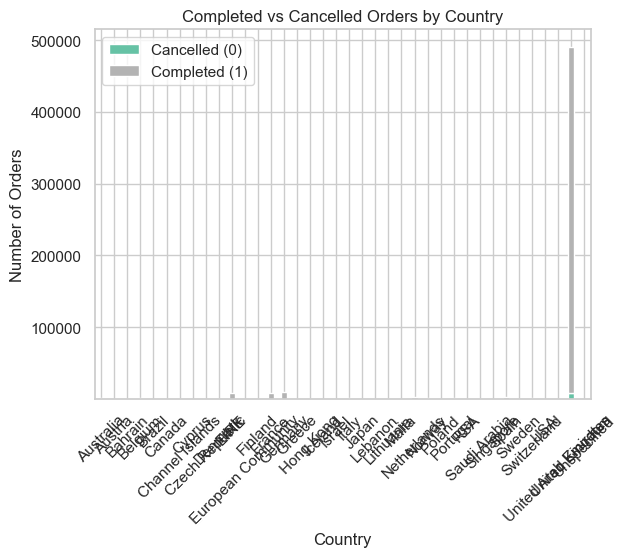

In [43]:
plt.figure(figsize=(12,6))
status_counts = df.groupby(['Country', 'IsCompleted']).size().unstack(fill_value=0)
status_counts.plot(kind='bar', stacked=True, colormap='Set2')
plt.title('Completed vs Cancelled Orders by Country')
plt.xlabel('Country')
plt.ylabel('Number of Orders')
plt.legend(['Cancelled (0)', 'Completed (1)'])
plt.xticks(rotation=45)
plt.show()


<Figure size 1400x600 with 0 Axes>

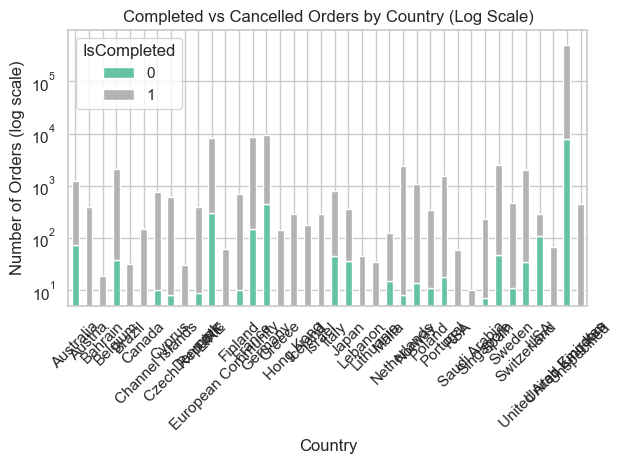

In [44]:
plt.figure(figsize=(14,6))
status_counts.plot(kind='bar', stacked=True, colormap='Set2')
plt.title('Completed vs Cancelled Orders by Country (Log Scale)')
plt.xlabel('Country')
plt.ylabel('Number of Orders (log scale)')
plt.yscale('log')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [45]:
summary = df.groupby('Country')['IsCompleted'].agg(
    Total_Orders='count',
    Completed_Orders='sum'
)
summary['Cancelled_Orders'] = summary['Total_Orders'] - summary['Completed_Orders']
summary['Completion_Rate (%)'] = (summary['Completed_Orders'] / summary['Total_Orders']) * 100
summary = summary.sort_values(by='Total_Orders', ascending=False).head(15)
print(summary)


                 Total_Orders  Completed_Orders  Cancelled_Orders  \
Country                                                             
United Kingdom         490300            482479              7821   
Germany                  9480              9027               453   
France                   8541              8393               148   
EIRE                     8184              7883               301   
Spain                    2528              2480                48   
Netherlands              2371              2363                 8   
Belgium                  2069              2031                38   
Switzerland              1994              1959                35   
Portugal                 1510              1492                18   
Australia                1258              1184                74   
Norway                   1086              1072                14   
Italy                     803               758                45   
Channel Islands           757     

C:\Users\Nada\AppData\Local\Temp\ipykernel_10376\2051820716.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary = df.groupby('Country')['IsCompleted'].agg(


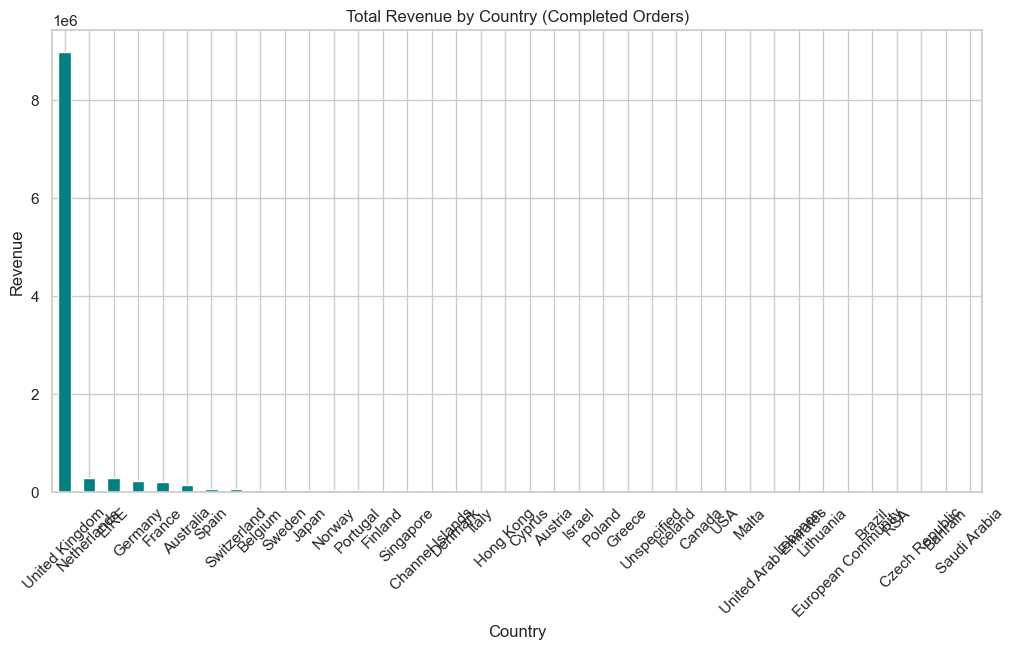

In [46]:
plt.figure(figsize=(12,6))
revenue_by_country.plot(kind='bar', color='teal')
plt.title('Total Revenue by Country (Completed Orders)')
plt.xlabel('Country')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.show()


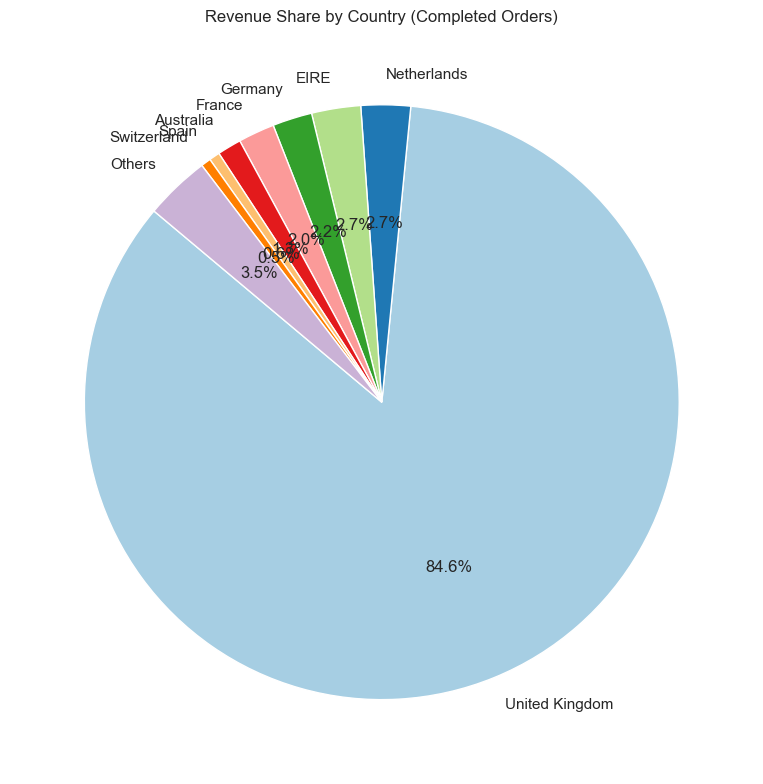

In [48]:
# Sort revenue descending
top_revenue = revenue_by_country.sort_values(ascending=False)

# Group everything beyond top 8 as 'Others'
top_n = 8
others = top_revenue[top_n:].sum()
top_revenue_filtered = top_revenue[:top_n].copy()
top_revenue_filtered['Others'] = others

# Plot clean pie chart
plt.figure(figsize=(8,8))
top_revenue_filtered.plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=140,
    colors=plt.cm.Paired.colors,
    wedgeprops={'linewidth': 1, 'edgecolor': 'white'}
)
plt.title('Revenue Share by Country (Completed Orders)')
plt.ylabel('')
plt.tight_layout()
plt.show()


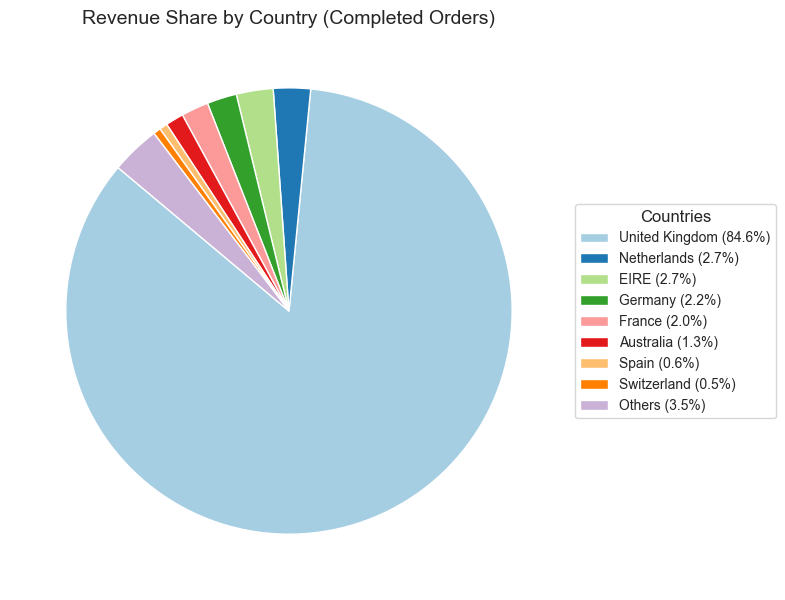

In [49]:
import matplotlib.pyplot as plt

# Calculate percentages for legend labels
percentages = top_revenue_filtered / top_revenue_filtered.sum() * 100
legend_labels = [f'{country} ({percent:.1f}%)' for country, percent in zip(top_revenue_filtered.index, percentages)]

plt.figure(figsize=(8,8))
wedges, texts = plt.pie(
    top_revenue_filtered,
    startangle=140,
    colors=plt.cm.Paired.colors,
    wedgeprops={'linewidth': 1, 'edgecolor': 'white'}
)

plt.title('Revenue Share by Country (Completed Orders)', fontsize=14)
plt.ylabel('')

# Add legend outside the pie chart
plt.legend(wedges, legend_labels, title="Countries", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1), fontsize=10)

plt.tight_layout()
plt.show()


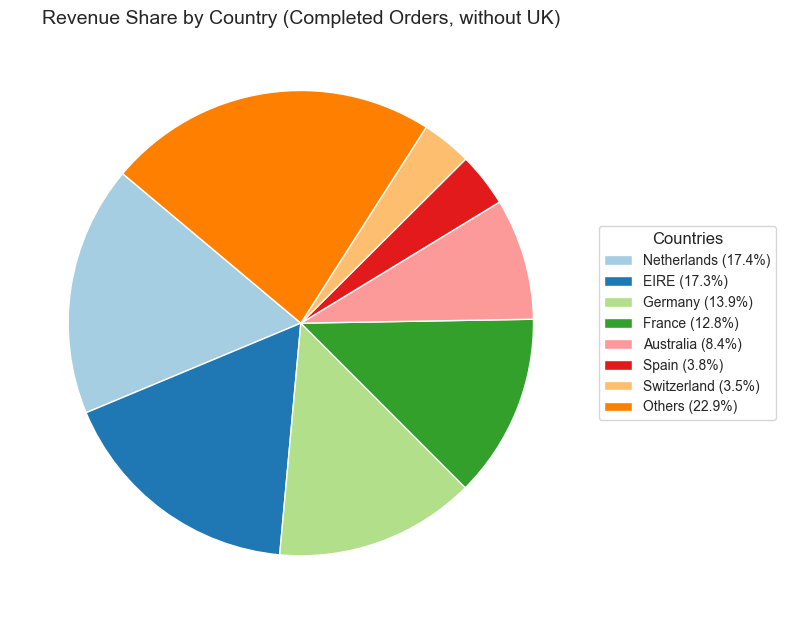

In [50]:
# Filter out UK from the data
top_revenue_no_uk = top_revenue_filtered[top_revenue_filtered.index != 'United Kingdom']

# Calculate percentages for legend labels without UK
percentages_no_uk = top_revenue_no_uk / top_revenue_no_uk.sum() * 100
legend_labels_no_uk = [f'{country} ({percent:.1f}%)' for country, percent in zip(top_revenue_no_uk.index, percentages_no_uk)]

plt.figure(figsize=(8,8))
wedges, texts = plt.pie(
    top_revenue_no_uk,
    startangle=140,
    colors=plt.cm.Paired.colors,
    wedgeprops={'linewidth': 1, 'edgecolor': 'white'}
)

plt.title('Revenue Share by Country (Completed Orders, without UK)', fontsize=14)
plt.ylabel('')

# Legend outside
plt.legend(wedges, legend_labels_no_uk, title="Countries", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1), fontsize=10)

plt.tight_layout()
plt.show()


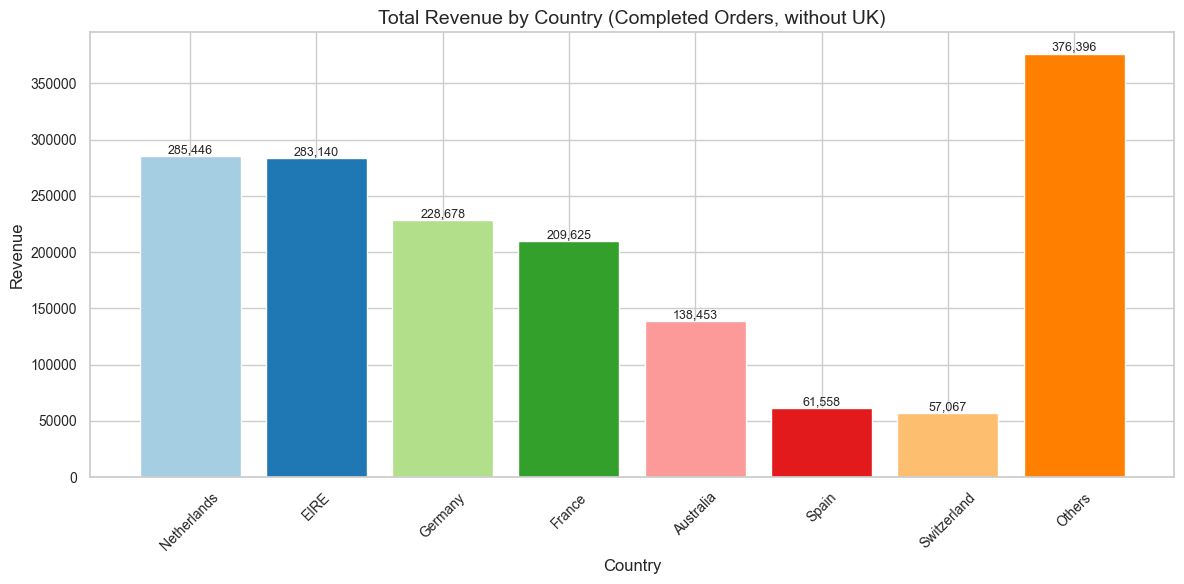

In [51]:
import matplotlib.pyplot as plt

# Filter out UK from the data
top_revenue_no_uk = top_revenue_filtered[top_revenue_filtered.index != 'United Kingdom']

plt.figure(figsize=(12,6))
bars = plt.bar(top_revenue_no_uk.index, top_revenue_no_uk, color=plt.cm.Paired.colors[:len(top_revenue_no_uk)])

plt.title('Total Revenue by Country (Completed Orders, without UK)', fontsize=14)
plt.xlabel('Country')
plt.ylabel('Revenue')
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)

# Add revenue labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, f'{int(height):,}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()


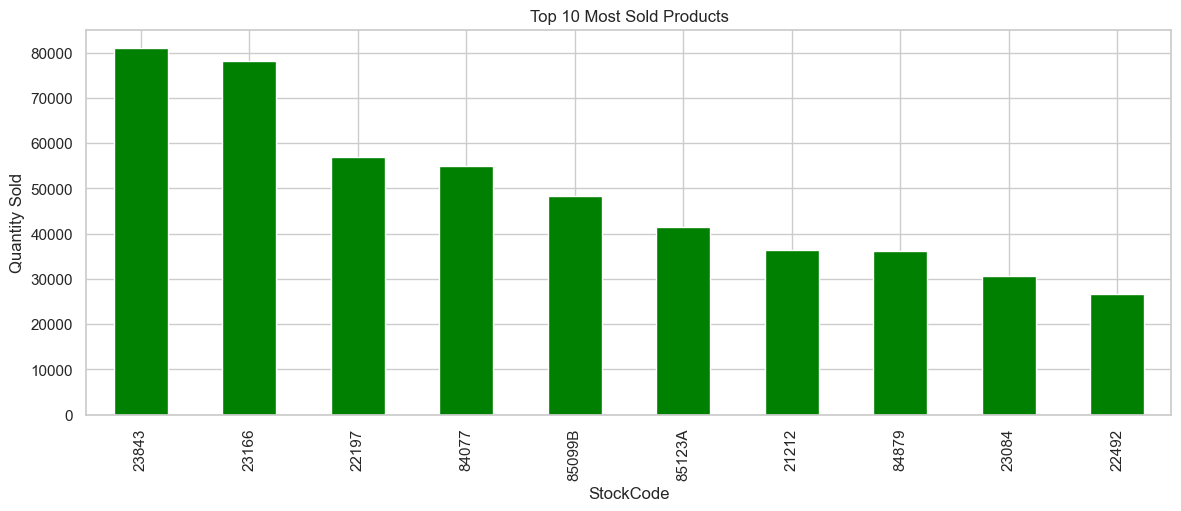

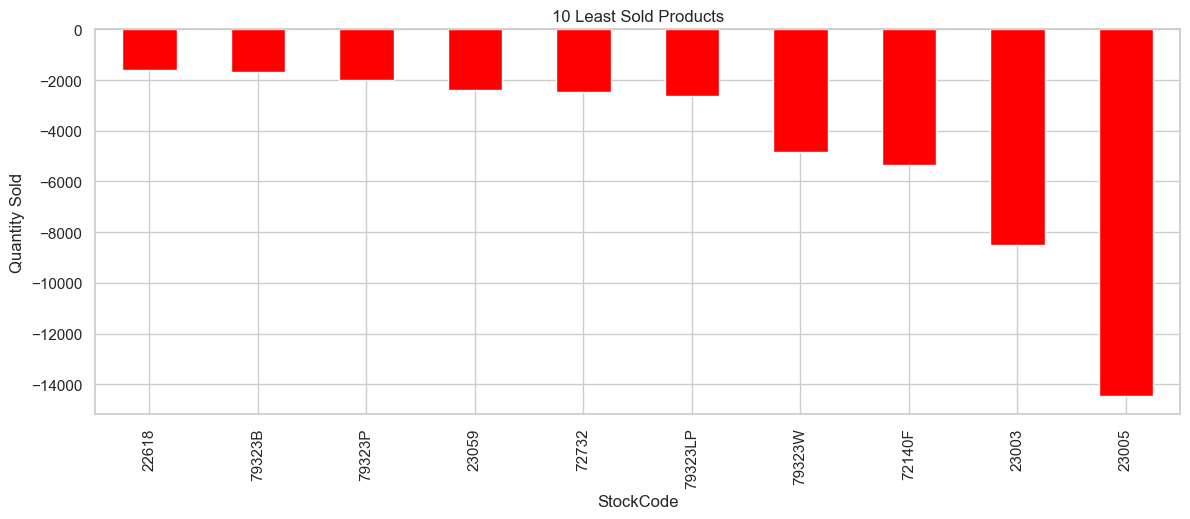

In [52]:
top_10_products = product_sales.head(10)
bottom_10_products = product_sales.tail(10)

plt.figure(figsize=(14,5))
top_10_products.plot(kind='bar', color='green')
plt.title('Top 10 Most Sold Products')
plt.xlabel('StockCode')
plt.ylabel('Quantity Sold')
plt.show()

plt.figure(figsize=(14,5))
bottom_10_products.plot(kind='bar', color='red')
plt.title('10 Least Sold Products')
plt.xlabel('StockCode')
plt.ylabel('Quantity Sold')
plt.show()


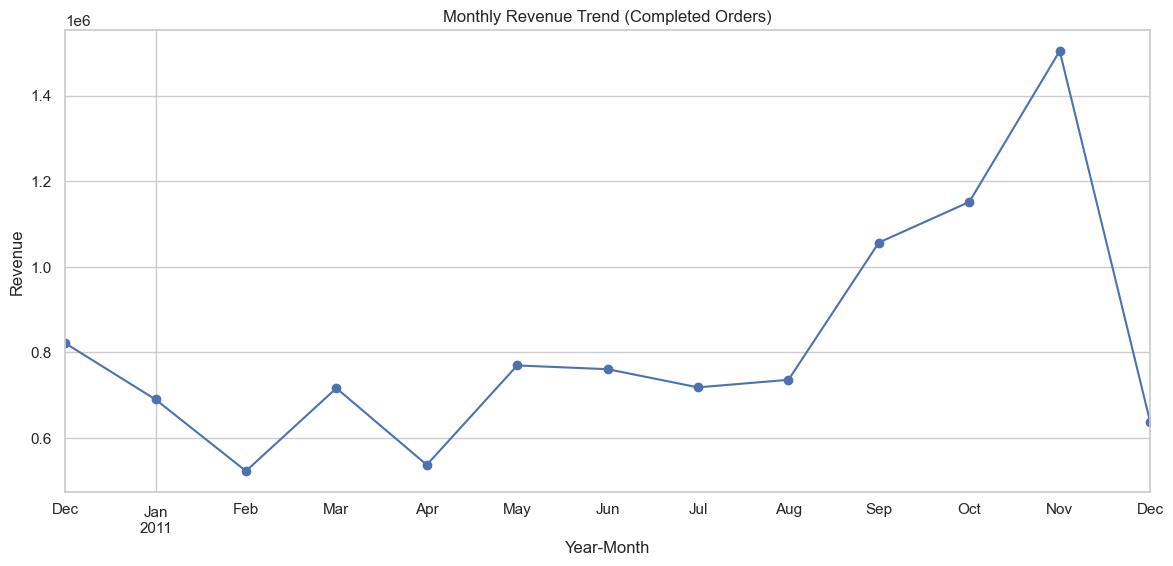

In [53]:
monthly_revenue = df[df['IsCompleted'] == 1].groupby('YearMonth')['Revenue'].sum()

plt.figure(figsize=(14,6))
monthly_revenue.plot(marker='o')
plt.title('Monthly Revenue Trend (Completed Orders)')
plt.xlabel('Year-Month')
plt.ylabel('Revenue')
plt.grid(True)
plt.show()


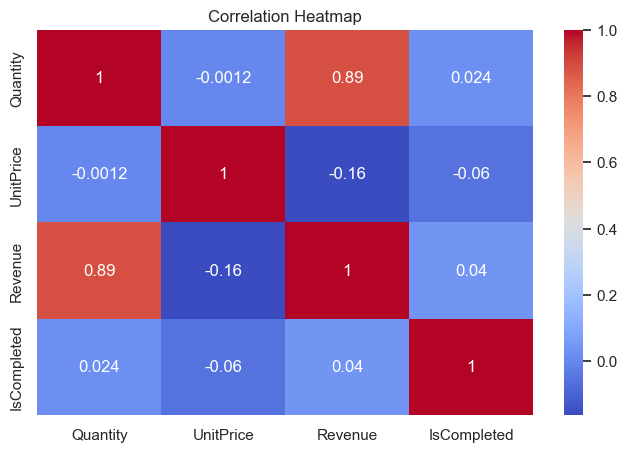

In [54]:
plt.figure(figsize=(8,5))
sns.heatmap(df[['Quantity', 'UnitPrice', 'Revenue', 'IsCompleted']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [55]:
# Convert to datetime if not already
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Get the min and max dates
start_date = df['InvoiceDate'].min()
end_date = df['InvoiceDate'].max()

print("Start date:", start_date)
print("End date:", end_date)


Start date: 2010-12-01 08:26:00
End date: 2011-12-09 12:50:00


In [56]:
df.describe()


,Quantity,InvoiceDate,UnitPrice,IsCompleted,Revenue
count,536641.000000,536641,536641.000000,536641.000000,536641.000000
mean,9.620029,2011-07-04 08:57:06.087421952,4.632656,0.982761,18.123861
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,0.000000,-168469.600000
25%,1.000000,2011-03-28 10:52:00,1.250000,1.000000,3.750000
50%,3.000000,2011-07-19 14:04:00,2.080000,1.000000,9.870000
75%,10.000000,2011-10-18 17:05:00,4.130000,1.000000,17.400000
max,80995.000000,2011-12-09 12:50:00,38970.000000,1.000000,168469.600000
std,219.130156,NaN,97.233118,0.130160,380.656263


In [57]:
df.duplicated().sum()


np.int64(2)

In [58]:
df[df.duplicated()].head()


,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,Country,IsCompleted,Revenue,YearMonth
199144,554084,23298,3,2011-05-22 11:52:00,4.95,United Kingdom,1,14.85,2011-05
452371,575335,23203,300,2011-11-09 13:56:00,1.79,United Kingdom,1,537.00,2011-11


In [59]:
df.duplicated(subset=["CustomerID", "Country"]).sum()


KeyError: Index(['CustomerID'], dtype='object')

In [60]:
df['Description'] = df['Description'].str.strip().str.lower()


KeyError: 'Description'

In [61]:
dupes = df[df.duplicated()]
print(dupes.head())


       InvoiceNo StockCode  Quantity         InvoiceDate  UnitPrice  \
199144    554084     23298         3 2011-05-22 11:52:00       4.95   
452371    575335     23203       300 2011-11-09 13:56:00       1.79   

               Country  IsCompleted  Revenue YearMonth  
199144  United Kingdom            1    14.85   2011-05  
452371  United Kingdom            1   537.00   2011-11  


In [62]:
df.loc[[199144, 452371]]


,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,Country,IsCompleted,Revenue,YearMonth
199144,554084,23298,3,2011-05-22 11:52:00,4.95,United Kingdom,1,14.85,2011-05
452371,575335,23203,300,2011-11-09 13:56:00,1.79,United Kingdom,1,537.00,2011-11


In [63]:
print(df.columns)


Index(['InvoiceNo', 'StockCode', 'Quantity', 'InvoiceDate', 'UnitPrice',
       'Country', 'IsCompleted', 'Revenue', 'YearMonth'],
      dtype='object')


In [65]:
raw_df = pd.read_excel("Online Retail - Copy.xlsx")
print("Removed:", raw_df.shape[0] - df.shape[0])


Removed: 5268


In [66]:
removed = pd.merge(raw_df, df, how='outer', indicator=True).query('_merge == "left_only"')
removed.head(10)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,IsCompleted,Revenue,YearMonth,_merge


In [67]:
# Compare the original and deduplicated versions to see what was dropped
dupes = raw_df[raw_df.duplicated(keep=False)]
dupes.sort_values(by=list(dupes.columns)).head(10)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
494,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908.0,United Kingdom
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908.0,United Kingdom
485,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2010-12-01 11:45:00,4.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2010-12-01 11:45:00,4.95,17908.0,United Kingdom
489,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,2010-12-01 11:45:00,2.10,17908.0,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,2010-12-01 11:45:00,2.10,17908.0,United Kingdom
521,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,2010-12-01 11:45:00,2.95,17908.0,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,2010-12-01 11:45:00,2.95,17908.0,United Kingdom
578,536412,21448,12 DAISY PEGS IN WOOD BOX,1,2010-12-01 11:49:00,1.65,17920.0,United Kingdom
598,536412,21448,12 DAISY PEGS IN WOOD BOX,1,2010-12-01 11:49:00,1.65,17920.0,United Kingdom


In [68]:
# Common ones might be:
df['Country'].value_counts()
df['IsCompleted'].value_counts()


IsCompleted
1    527390
0      9251
Name: count, dtype: int64

In [69]:
# Most sold items by quantity
df.groupby('StockCode')['Quantity'].sum().sort_values(ascending=False).head(10)

# Top revenue-generating products
df.groupby('StockCode')['Revenue'].sum().sort_values(ascending=False).head(10)


C:\Users\Nada\AppData\Local\Temp\ipykernel_10376\3631720361.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('StockCode')['Quantity'].sum().sort_values(ascending=False).head(10)
C:\Users\Nada\AppData\Local\Temp\ipykernel_10376\3631720361.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('StockCode')['Revenue'].sum().sort_values(ascending=False).head(10)


StockCode
DOT       206245.48
22423     164459.49
47566      98243.88
85123A     97838.45
85099B     92175.79
23084      66661.63
POST       66230.64
22086      63715.24
84879      58792.42
79321      53746.66
Name: Revenue, dtype: float64

In [70]:
df.groupby('Country')['Revenue'].sum().sort_values(ascending=False)


C:\Users\Nada\AppData\Local\Temp\ipykernel_10376\3430540517.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('Country')['Revenue'].sum().sort_values(ascending=False)


Country
United Kingdom          8167128.184
Netherlands              284661.540
EIRE                     262993.380
Germany                  221509.470
France                   197317.110
Australia                137009.770
Switzerland               56363.050
Spain                     54756.030
Belgium                   40910.960
Sweden                    36585.410
Japan                     35340.620
Norway                    35163.460
Portugal                  29302.970
Finland                   22326.740
Channel Islands           20076.390
Denmark                   18768.140
Italy                     16890.510
Cyprus                    12858.760
Austria                   10154.320
Hong Kong                  9908.240
Singapore                  9120.390
Israel                     7901.970
Poland                     7213.140
Unspecified                4740.940
Greece                     4710.520
Iceland                    4310.000
Canada                     3666.380
Malta               

<Axes: title={'center': 'Monthly Revenue Trend'}, xlabel='Month', ylabel='Revenue'>

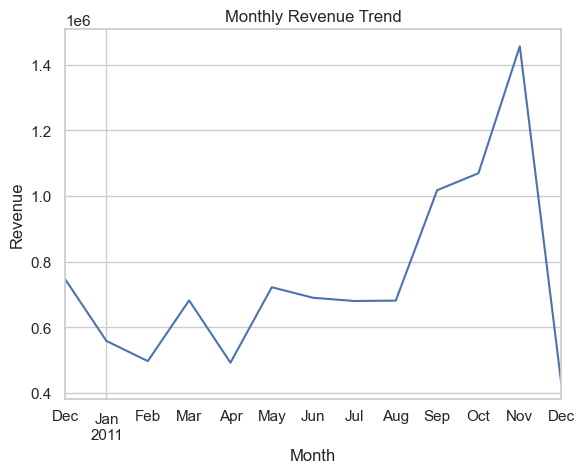

In [71]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['Month'] = df['InvoiceDate'].dt.to_period('M')

monthly_revenue = df.groupby('Month')['Revenue'].sum()
monthly_revenue.plot(kind='line', title='Monthly Revenue Trend', ylabel='Revenue', xlabel='Month')


In [72]:
# Completion rate
df['IsCompleted'].value_counts(normalize=True)


IsCompleted
1    0.982761
0    0.017239
Name: proportion, dtype: float64

In [73]:
df.shape  # rows and columns

(536641, 10)

In [74]:
df.info()  # data types and nulls

<class 'pandas.core.frame.DataFrame'>
Index: 536641 entries, 0 to 541908
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    536641 non-null  object        
 1   StockCode    536641 non-null  category      
 2   Quantity     536641 non-null  int64         
 3   InvoiceDate  536641 non-null  datetime64[ns]
 4   UnitPrice    536641 non-null  float64       
 5   Country      536641 non-null  category      
 6   IsCompleted  536641 non-null  int64         
 7   Revenue      536641 non-null  float64       
 8   YearMonth    536641 non-null  period[M]     
 9   Month        536641 non-null  period[M]     
dtypes: category(2), datetime64[ns](1), float64(2), int64(2), object(1), period[M](2)
memory usage: 54.7+ MB


In [75]:
df.isna().sum()  # missing values per column

InvoiceNo      0
StockCode      0
Quantity       0
InvoiceDate    0
UnitPrice      0
Country        0
IsCompleted    0
Revenue        0
YearMonth      0
Month          0
dtype: int64

In [76]:
df.describe(include='all')  # numeric and categorical summary


,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,Country,IsCompleted,Revenue,YearMonth,Month
count,536641.0,536641,536641.000000,536641,536641.000000,536641,536641.000000,536641.000000,536641,536641
unique,25900.0,4070,NaN,NaN,NaN,38,NaN,NaN,13,13
top,573585.0,85123A,NaN,NaN,NaN,United Kingdom,NaN,NaN,2011-11,2011-11
freq,1114.0,2301,NaN,NaN,NaN,490300,NaN,NaN,83343,83343
mean,NaN,NaN,9.620029,2011-07-04 08:57:06.087421952,4.632656,NaN,0.982761,18.123861,NaN,NaN
min,NaN,NaN,-80995.000000,2010-12-01 08:26:00,-11062.060000,NaN,0.000000,-168469.600000,NaN,NaN
25%,NaN,NaN,1.000000,2011-03-28 10:52:00,1.250000,NaN,1.000000,3.750000,NaN,NaN
50%,NaN,NaN,3.000000,2011-07-19 14:04:00,2.080000,NaN,1.000000,9.870000,NaN,NaN
75%,NaN,NaN,10.000000,2011-10-18 17:05:00,4.130000,NaN,1.000000,17.400000,NaN,NaN
max,NaN,NaN,80995.000000,2011-12-09 12:50:00,38970.000000,NaN,1.000000,168469.600000,NaN,NaN


In [78]:
df['Country'].value_counts().head(10)
df['StockCode'].value_counts().head(10)
df.groupby('StockCode')['Quantity'].sum().sort_values(ascending=False).head(10)
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']
df.groupby('StockCode')['TotalPrice'].sum().sort_values(ascending=False).head(10)


C:\Users\Nada\AppData\Local\Temp\ipykernel_10376\2080395470.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('StockCode')['Quantity'].sum().sort_values(ascending=False).head(10)
C:\Users\Nada\AppData\Local\Temp\ipykernel_10376\2080395470.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('StockCode')['TotalPrice'].sum().sort_values(ascending=False).head(10)


StockCode
DOT       206245.48
22423     164459.49
47566      98243.88
85123A     97838.45
85099B     92175.79
23084      66661.63
POST       66230.64
22086      63715.24
84879      58792.42
79321      53746.66
Name: TotalPrice, dtype: float64

<Axes: title={'center': 'Orders Per Month'}, xlabel='Month'>

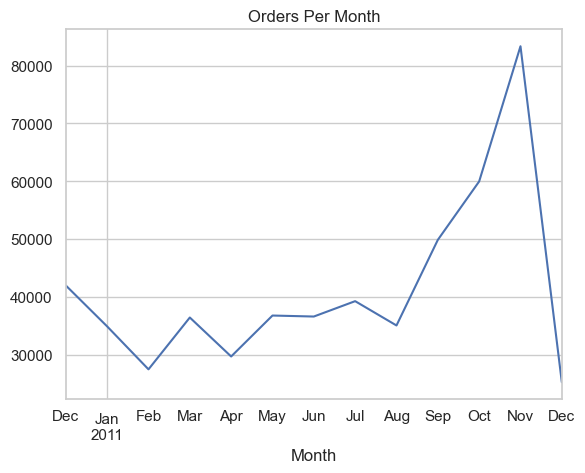

In [79]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['Month'] = df['InvoiceDate'].dt.to_period('M')
df['Hour'] = df['InvoiceDate'].dt.hour
df.groupby('Month').size().plot(title='Orders Per Month')


In [81]:
returns = df[df['Quantity'] < 0]
returns['StockCode'].value_counts().head()


StockCode
M        244
22423    183
POST     126
22960     87
D         77
Name: count, dtype: int64